Labwork 2:

Find two datasets with labels. Remember to split the dataset into training/test subsets.

1. Run k-nn on these two datasets.
2. Calculate the classification error, precision, recall, and f1-score (by comparing the class labels obtained with the prediction and the original labels of the test data).3. Vary the value of k, and comment on the results.
3. Try to normalize the input dataset. Is the performance better?
4. Apply PCA and SVD on the dataset, then what is the performance of k-nn on the new projected data? Justify the answer.

5. Repeat these questions for SVM.


In [ ]:
# 1. Imports and Data Loading
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [ ]:
# Load Iris dataset
iris_df = pd.read_csv(
    r'E:\MSE\HomeWork\Ky 2\MLE501.9\Test\Lab\Lab 2\Data\Iris.csv')
if 'Id' in iris_df.columns:
    iris_df = iris_df.drop(columns=['Id'])
X_iris = iris_df.drop(columns=['Species'])
y_iris = iris_df['Species']

# Load WineQT dataset
wine_df = pd.read_csv(
    r'E:\MSE\HomeWork\Ky 2\MLE501.9\Test\Lab\Lab 2\Data\WineQT.csv')
X_wine = wine_df.drop(columns=['quality'])
y_wine = wine_df['quality']

print("Iris shape:", X_iris.shape, "| WineQT shape:", X_wine.shape)


Iris shape: (150, 4) | WineQT shape: (1143, 12)


In [ ]:
# 2. Train/Test Split
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42, stratify=y_wine
)


In [ ]:
# 3. Evaluation Function
def evaluate_clf(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    err = 1 - acc
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    print(
        f"Accuracy: {acc:.3f} | Error: {err:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
    return err, prec, rec, f1


In [ ]:

# 4. k-NN (k=5) on Original Data
print("\n### Iris – k-NN (k=5) original")
knn_i = KNeighborsClassifier(n_neighbors=5)
knn_i.fit(X_train_i, y_train_i)
evaluate_clf(knn_i, X_test_i, y_test_i)

print("\n### WineQT – k-NN (k=5) original")
knn_w = KNeighborsClassifier(n_neighbors=5)
knn_w.fit(X_train_w, y_train_w)
evaluate_clf(knn_w, X_test_w, y_test_w)



### Iris – k-NN (k=5) original
Accuracy: 0.978 | Error: 0.022 | Precision: 0.979 | Recall: 0.978 | F1: 0.978

### WineQT – k-NN (k=5) original
Accuracy: 0.510 | Error: 0.490 | Precision: 0.476 | Recall: 0.510 | F1: 0.488


(0.4897959183673469,
 0.47638378482249777,
 0.5102040816326531,
 0.48797021127560486)


Iris – vary k
Accuracy: 0.933 | Error: 0.067 | Precision: 0.944 | Recall: 0.933 | F1: 0.933
Accuracy: 0.956 | Error: 0.044 | Precision: 0.961 | Recall: 0.956 | F1: 0.955
Accuracy: 0.978 | Error: 0.022 | Precision: 0.979 | Recall: 0.978 | F1: 0.978
Accuracy: 0.956 | Error: 0.044 | Precision: 0.961 | Recall: 0.956 | F1: 0.955
Accuracy: 0.956 | Error: 0.044 | Precision: 0.961 | Recall: 0.956 | F1: 0.955
Accuracy: 0.933 | Error: 0.067 | Precision: 0.935 | Recall: 0.933 | F1: 0.933


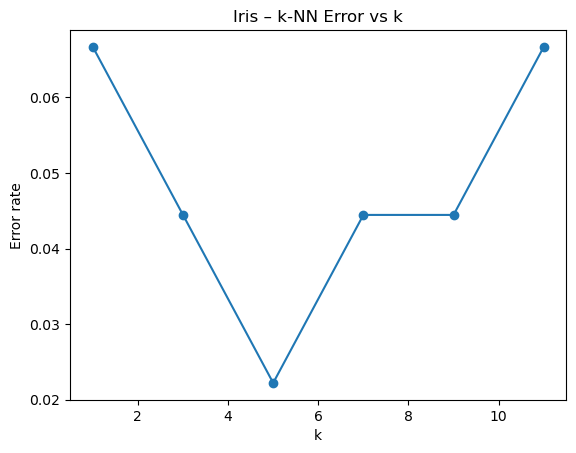


WineQT – vary k
Accuracy: 0.548 | Error: 0.452 | Precision: 0.548 | Recall: 0.548 | F1: 0.546
Accuracy: 0.528 | Error: 0.472 | Precision: 0.521 | Recall: 0.528 | F1: 0.518
Accuracy: 0.510 | Error: 0.490 | Precision: 0.476 | Recall: 0.510 | F1: 0.488
Accuracy: 0.493 | Error: 0.507 | Precision: 0.456 | Recall: 0.493 | F1: 0.470
Accuracy: 0.481 | Error: 0.519 | Precision: 0.443 | Recall: 0.481 | F1: 0.456
Accuracy: 0.504 | Error: 0.496 | Precision: 0.462 | Recall: 0.504 | F1: 0.477


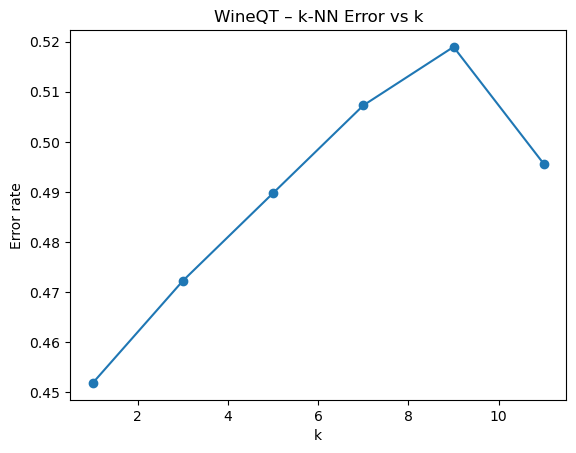

In [ ]:
# 5. Varying k: Plot Error vs k
def plot_error_vs_k(X_train, X_test, y_train, y_test, title):
    ks = [1, 3, 5, 7, 9, 11]
    errors = []
    for k in ks:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        err, *_ = evaluate_clf(clf, X_test, y_test)
        errors.append(err)
    plt.figure()
    plt.plot(ks, errors, marker='o')
    plt.title(f"{title} – k-NN Error vs k")
    plt.xlabel("k")
    plt.ylabel("Error rate")
    plt.show()


print("\nIris – vary k")
plot_error_vs_k(X_train_i, X_test_i, y_train_i, y_test_i, "Iris")

print("\nWineQT – vary k")
plot_error_vs_k(X_train_w, X_test_w, y_train_w, y_test_w, "WineQT")


In [ ]:
# 6. Normalization + k-NN
scaler_i = StandardScaler().fit(X_train_i)
X_train_i_sc = scaler_i.transform(X_train_i)
X_test_i_sc = scaler_i.transform(X_test_i)

scaler_w = StandardScaler().fit(X_train_w)
X_train_w_sc = scaler_w.transform(X_train_w)
X_test_w_sc = scaler_w.transform(X_test_w)

print("\n### Iris – k-NN (k=5) after scaling")
knn_i_sc = KNeighborsClassifier(n_neighbors=5)
knn_i_sc.fit(X_train_i_sc, y_train_i)
evaluate_clf(knn_i_sc, X_test_i_sc, y_test_i)

print("\n### WineQT – k-NN (k=5) after scaling")
knn_w_sc = KNeighborsClassifier(n_neighbors=5)
knn_w_sc.fit(X_train_w_sc, y_train_w)
evaluate_clf(knn_w_sc, X_test_w_sc, y_test_w)



### Iris – k-NN (k=5) after scaling
Accuracy: 0.911 | Error: 0.089 | Precision: 0.930 | Recall: 0.911 | F1: 0.910

### WineQT – k-NN (k=5) after scaling
Accuracy: 0.574 | Error: 0.426 | Precision: 0.546 | Recall: 0.574 | F1: 0.560


(0.4256559766763849,
 0.5456178575945599,
 0.5743440233236151,
 0.5595211936364652)

In [ ]:
# 7. PCA & SVD + k-NN (Iris example)
# PCA: keep 95% variance
pca_i = PCA(n_components=0.95).fit(X_train_i_sc)
X_train_i_pca = pca_i.transform(X_train_i_sc)
X_test_i_pca = pca_i.transform(X_test_i_sc)

# SVD with same number of components
svd_i = TruncatedSVD(n_components=pca_i.n_components_).fit(X_train_i_sc)
X_train_i_svd = svd_i.transform(X_train_i_sc)
X_test_i_svd = svd_i.transform(X_test_i_sc)

print("\n### Iris – k-NN after PCA")
knn_i_pca = KNeighborsClassifier(n_neighbors=5)
knn_i_pca.fit(X_train_i_pca, y_train_i)
evaluate_clf(knn_i_pca, X_test_i_pca, y_test_i)

print("\n### Iris – k-NN after SVD")
knn_i_svd = KNeighborsClassifier(n_neighbors=5)
knn_i_svd.fit(X_train_i_svd, y_train_i)
evaluate_clf(knn_i_svd, X_test_i_svd, y_test_i)



### Iris – k-NN after PCA
Accuracy: 0.911 | Error: 0.089 | Precision: 0.916 | Recall: 0.911 | F1: 0.911

### Iris – k-NN after SVD
Accuracy: 0.911 | Error: 0.089 | Precision: 0.916 | Recall: 0.911 | F1: 0.911


(0.0888888888888889,
 0.9155354449472096,
 0.9111111111111111,
 0.9107142857142857)

In [ ]:
# 8. SVM on Iris (Original, Scaled, PCA)
print("\n### Iris – SVM original")
svm_i = SVC(kernel='rbf', C=1).fit(X_train_i, y_train_i)
evaluate_clf(svm_i, X_test_i, y_test_i)

print("\n### Iris – SVM after scaling")
svm_i_sc = SVC(kernel='rbf', C=1).fit(X_train_i_sc, y_train_i)
evaluate_clf(svm_i_sc, X_test_i_sc, y_test_i)

print("\n### Iris – SVM after PCA")
svm_i_pca = SVC(kernel='rbf', C=1).fit(X_train_i_pca, y_train_i)
evaluate_clf(svm_i_pca, X_test_i_pca, y_test_i)

# Note: To repeat SVM for WineQT, mirror the above using X_train_w, X_test_w, scaler_w, PCA on WineQT, e



### Iris – SVM original
Accuracy: 0.956 | Error: 0.044 | Precision: 0.956 | Recall: 0.956 | F1: 0.956

### Iris – SVM after scaling
Accuracy: 0.933 | Error: 0.067 | Precision: 0.935 | Recall: 0.933 | F1: 0.933

### Iris – SVM after PCA
Accuracy: 0.911 | Error: 0.089 | Precision: 0.916 | Recall: 0.911 | F1: 0.911


(0.0888888888888889,
 0.9155354449472096,
 0.9111111111111111,
 0.9107142857142857)